# Sources

Get number of sources binned in longitude, latitude, and flux using both the 2FIG candidates from Mattia and 3FGL sources. The combination of both of these will form the dataset analyzed.

As for the efficiency note that we have 12x12 spatial bins in the 40x40 region, with our bins starting on the top left of the map (l,b)=(20,20) and moving to the bottom right (l,b)=(-20,-20).

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from astropy.io import fits
import matplotlib
matplotlib.matplotlib_fname()
import matplotlib.pyplot as plt

## 2FIG pulsar candidates

In [2]:
# Set mask in degrees - distance from GC within which we ignore events
mask = 2.

# Load the raw data, contains 86 pulsar candidates with associated l, b, flux values
# This is a digitized version of the source list in 
rd = np.loadtxt('../likelihood/data/psrcandidates.dat')

# Define our bin edges
angbins = -np.linspace(-20,20,13) # - because top left is 0,0 and astro longitude
fluxbins = np.append(np.logspace(-6,-5,7), np.logspace(-5,-4,3)[1:3])

PSR_data = np.zeros((12,12,8))

# Now bin the data
for ips in range(len(rd)):
    lval = rd[ips, 0]
    bval = rd[ips, 1]
    fval = rd[ips, 2]
    if np.cos(lval*np.pi/180.)*np.cos(bval*np.pi/180.) > np.cos(mask*np.pi/180.): continue
    for li in range(12):
        if (lval <= angbins[li]) & (lval > angbins[li+1]):
            for bi in range(12):
                if (bval <= angbins[bi]) & (bval > angbins[bi+1]):
                    for fi in range(8):
                        if (fval >= fluxbins[fi]) & (fval < fluxbins[fi+1]):
                            PSR_data[li,bi,fi] += 1.

In [3]:
# Save 2FIG candidates
np.save('../likelihood/data/PSR_data.npy',PSR_data)

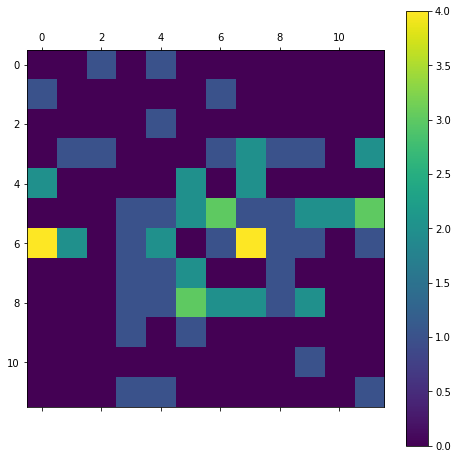

In [4]:
# Plot the data summed over all flux bins
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# transpose as it plots the first index on the y-axis
cax = ax.matshow(np.transpose(np.sum(PSR_data,axis=2)), interpolation='nearest')
fig.colorbar(cax)
plt.show()

## 3FGL sources

In [5]:
# Load 2FIG catalog
load = fits.open('../likelihood/data/2FIG_Pass8_Arxiv.fits')
cat = np.array(load[1].data)

glon = np.array([])
glat = np.array([])
eflux = np.array([])

for i in range(len(cat)):
    # Check if PSR or psr
    if (cat[i][22] == 'PSR') | (cat[i][22] == 'psr'):
        glon = np.append(glon,cat[i][3])
        glat = np.append(glat,cat[i][4])
        eflux = np.append(eflux,cat[i][11])

# Now bin
angbins = -np.linspace(-20,20,13) # - because top left is 0,0 and astro longitude
fluxbins = np.append(np.logspace(-6,-5,7), np.logspace(-5,-4,3)[1:3])

PSR_data_3fgl = np.zeros((12,12,8))

for ips in range(len(glon)):
    lval = glon[ips]
    bval = glat[ips]
    if np.cos(lval*np.pi/180.)*np.cos(bval*np.pi/180.) > np.cos(mask*np.pi/180.): continue
    fval = eflux[ips]
    for li in range(12):
        if (lval <= angbins[li]) & (lval > angbins[li+1]):
            for bi in range(12):
                if (bval <= angbins[bi]) & (bval > angbins[bi+1]):
                    for fi in range(8):
                        if (fval >= fluxbins[fi]) & (fval < fluxbins[fi+1]):
                            PSR_data_3fgl[li,bi,fi] += 1.

In [6]:
# Save 3FGL candidates
np.save('../likelihood/data/PSR_data_3fgl.npy',PSR_data_3fgl)

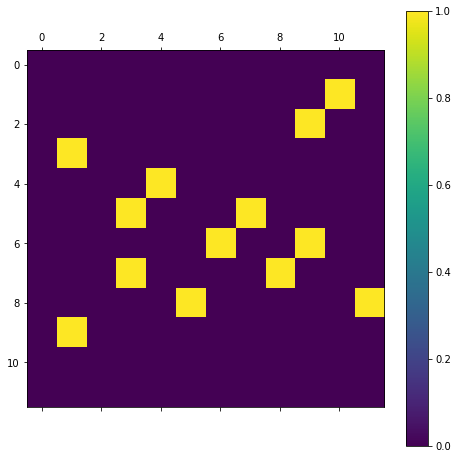

In [7]:
# Plot the data summed over all flux bins
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# transpose as it plots the first index on the y-axis
cax = ax.matshow(np.transpose(np.sum(PSR_data_3fgl,axis=2)), interpolation='nearest')
fig.colorbar(cax)
plt.show()

## Plot the combined data

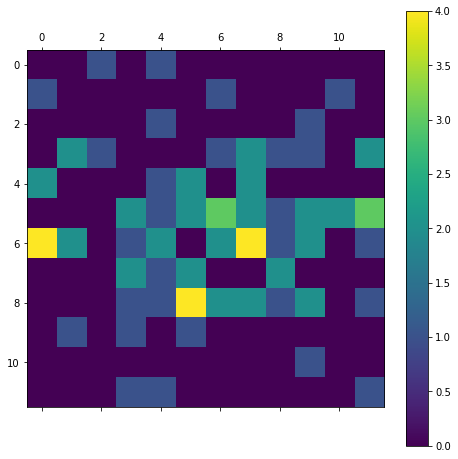

In [8]:
# Plot the data summed over all flux bins
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# transpose as it plots the first index on the y-axis
cax = ax.matshow(np.transpose(np.sum(PSR_data+PSR_data_3fgl,axis=2)), interpolation='nearest')
fig.colorbar(cax)
plt.show()